In [1]:
#removing the outliers involves 2 method
#1. IQR(inter quantile range) method
#2. direct method
#3. z-score method

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
n=pd.read_csv("asd.csv")
n.head(2)

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close


In [2]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

In [3]:
#to check min and max value

n.describe()

,Your Matric (grade 12) Average/ GPA (in %),Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
count,399.000000,320.000000
mean,77.989724,66.268469
std,7.048618,9.147906
min,34.000000,30.000000
25%,74.000000,60.000000
50%,78.000000,65.000000
75%,83.000000,73.000000
max,99.000000,95.220000


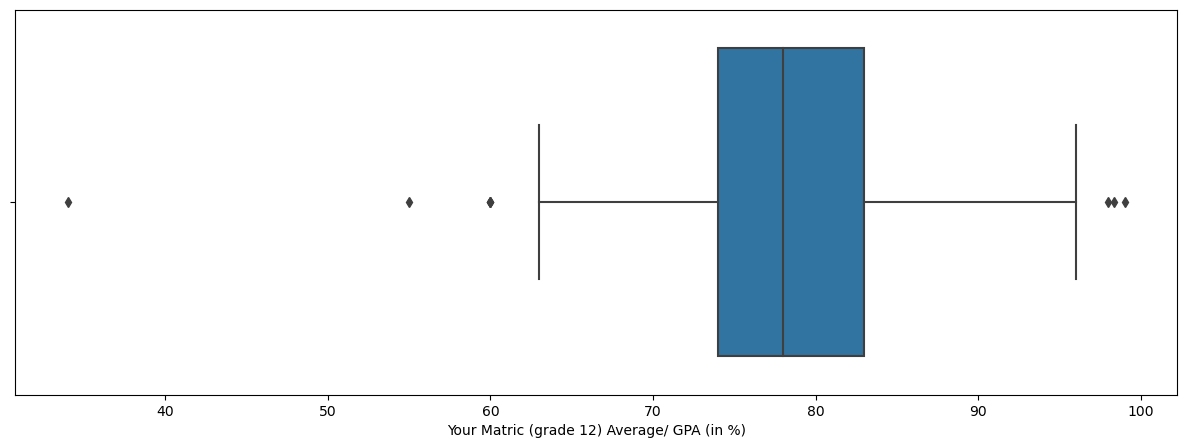

In [4]:
#boxplot to check outliers(dots)

plt.figure(figsize=(15,5))
sns.boxplot(x="Your Matric (grade 12) Average/ GPA (in %)",data=n)
plt.show()

C:\Users\tonyf\AppData\Local\Temp\ipykernel_12420\838383996.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n["Your Matric (grade 12) Average/ GPA (in %)"])


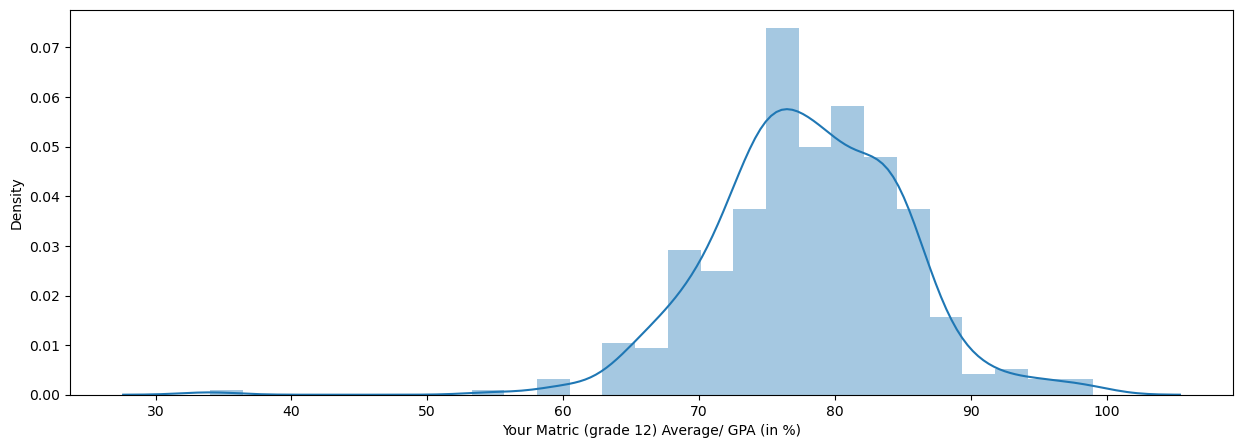

In [5]:
#distplot to check outliers(dots)


plt.figure(figsize=(15,5))
sns.distplot(n["Your Matric (grade 12) Average/ GPA (in %)"])
plt.show()

In [6]:
n.shape

(406, 17)

In [7]:
#to find quantile range

q1=n["Your Matric (grade 12) Average/ GPA (in %)"].quantile(0.25)
q3=n["Your Matric (grade 12) Average/ GPA (in %)"].quantile(0.75)
q1,q3

(74.0, 83.0)

In [8]:
#IQR(Inter quantile range) Fromula

IQR=q3-q1

In [9]:
#to find the miniumum and maximum range

min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
max_range,min_range

(96.5, 60.5)

In [10]:
#Adjusting the values 

new_n=n[n["Your Matric (grade 12) Average/ GPA (in %)"]<=max_range]

In [11]:
new_n.shape

(396, 17)

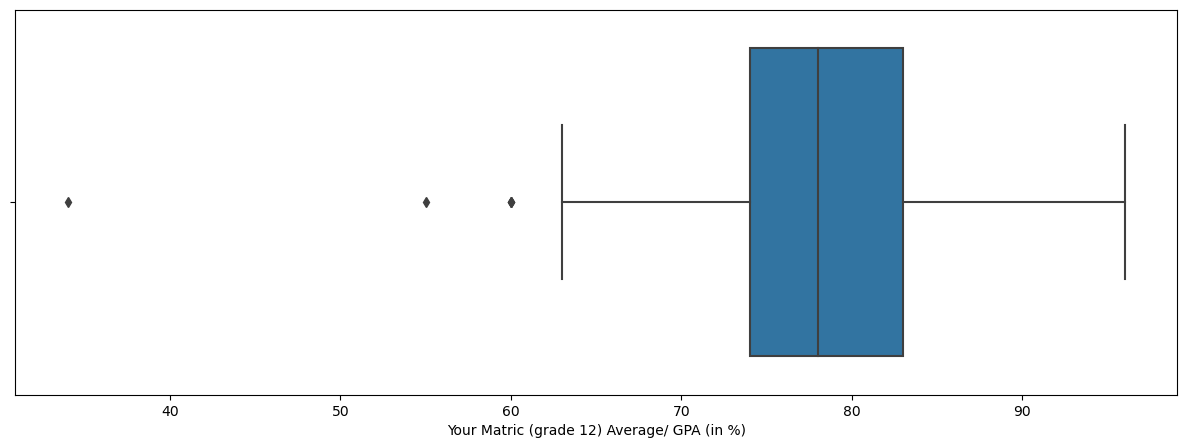

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Your Matric (grade 12) Average/ GPA (in %)",data=new_n)
plt.show()

C:\Users\tonyf\AppData\Local\Temp\ipykernel_12420\2970255620.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_n["Your Matric (grade 12) Average/ GPA (in %)"])


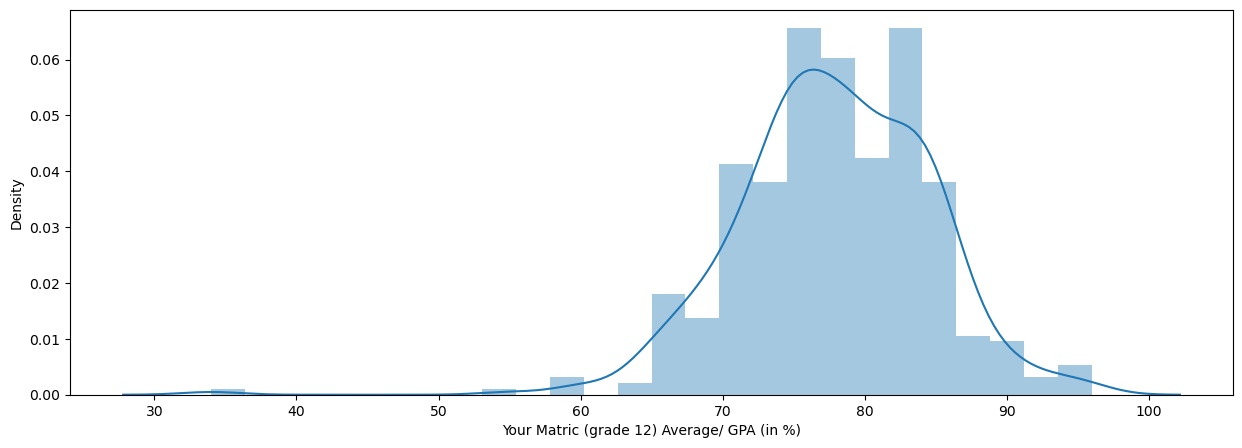

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(new_n["Your Matric (grade 12) Average/ GPA (in %)"])
plt.show()

In [14]:
# direct method

# Also reffer gallery    

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
m=pd.read_csv("imdb.csv")
m.head(2)

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M


In [15]:
m.shape

(2000, 10)

In [16]:
m.isnull().sum()

Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       81
Votes            0
Genre            0
Director         0
Cast             0
Gross           97
dtype: int64

In [17]:
m.describe()

,Duration,IMDB Rating,Metascore
count,2000.000000,2000.000000,1919.000000
mean,113.939000,6.922600,61.044294
std,22.946035,0.955618,17.937722
min,50.000000,1.500000,9.000000
25%,98.000000,6.400000,48.000000
50%,110.000000,7.000000,61.000000
75%,125.000000,7.600000,74.000000
max,271.000000,9.300000,100.000000


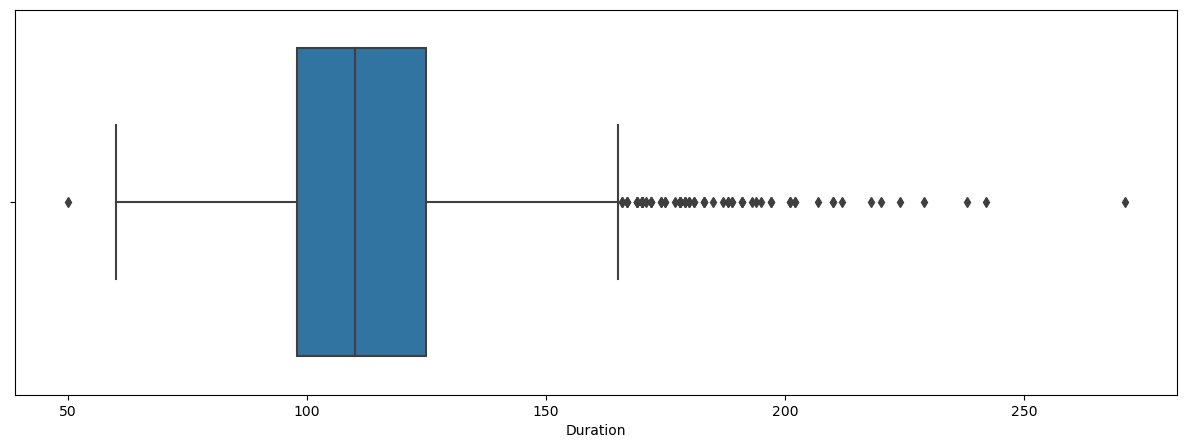

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Duration",data=m)
plt.show()

C:\Users\tonyf\AppData\Local\Temp\ipykernel_12420\3154186765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m["Duration"])


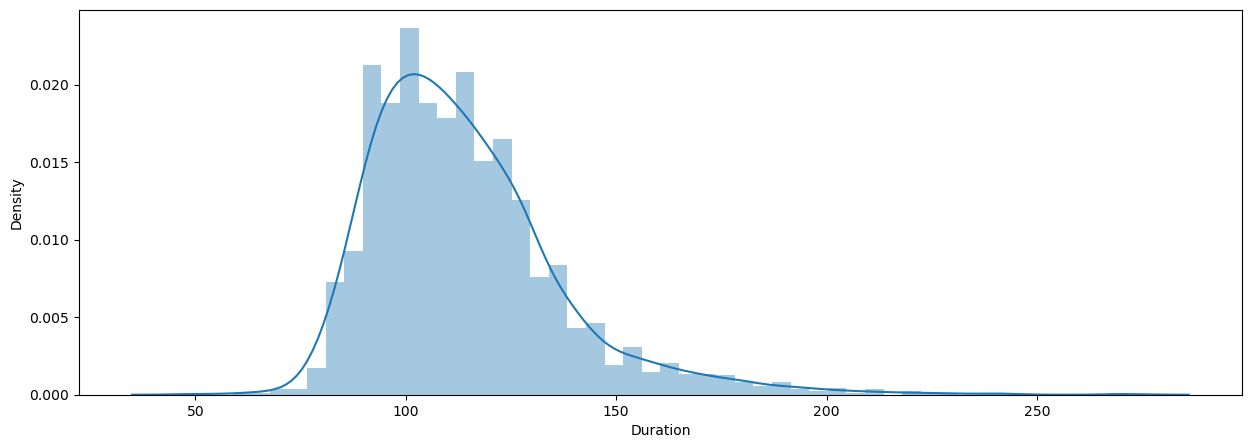

In [19]:
plt.figure(figsize=(15,5))
sns.distplot(m["Duration"])
plt.show()

In [20]:
#direct method formula

max_range1=m["Duration"].mean()+(3*m["Duration"].std())
min_range1=m["Duration"].mean()-(3*m["Duration"].std())
max_range1,min_range1

(182.77710611446759, 45.100893885532386)

In [21]:
new_m=m[m["Duration"]<=max_range1]

In [22]:
new_m["Duration"]

0       175
2       124
4       113
5       138
6       166
       ... 
1995    105
1996    101
1997    108
1998     90
1999     89
Name: Duration, Length: 1968, dtype: int64

In [23]:
new_m.shape

(1968, 10)

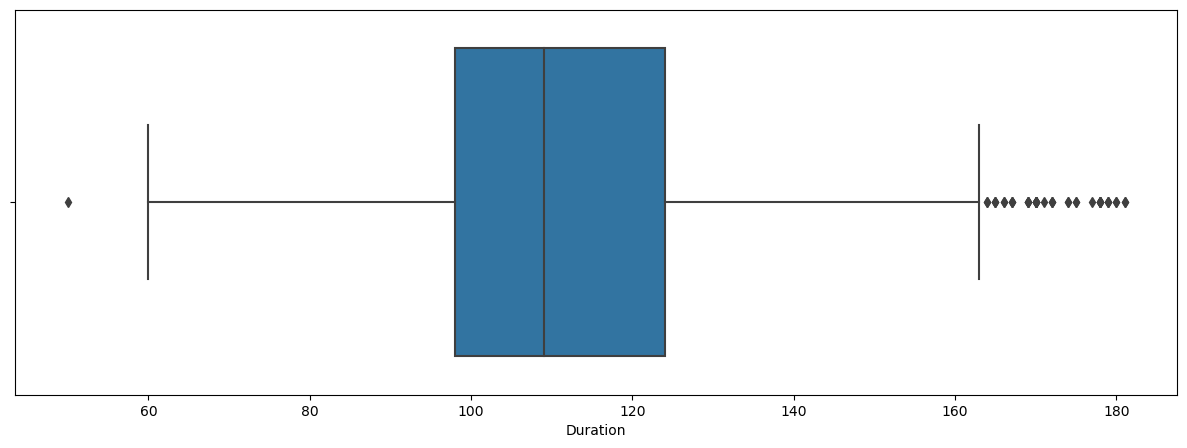

In [24]:
#reduced outliers as boxplot

plt.figure(figsize=(15,5))
sns.boxplot(x="Duration",data=new_m)
plt.show()

In [25]:
#z-score method
#do check in gallery


# z = ( x - mean(x) ) / std(x)

In [26]:
z_score=(m["Duration"]-m["Duration"].mean())/m["Duration"].std()

In [27]:
m["z_score"]=z_score

In [28]:
m.head(10)

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,z_score
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M,2.661070
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M,3.837744
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M,0.438464
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M,4.535032
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN,-0.040922
5,Close Encounters of the Third Kind,1977,138,7.6,90.0,"216,050","Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,$132.09M,1.048591
6,Once Upon a Time in the West,1968,166,8.5,82.0,"348,110",Western,Sergio Leone,Henry Fonda,$5.32M,2.268845
7,The Dirty Dozen,1967,150,7.7,73.0,"78,858","Action, Adventure, War",Robert Aldrich,Lee Marvin,$45.30M,1.571557
8,Rosemary's Baby,1968,137,8.0,96.0,"234,034","Drama, Horror",Roman Polanski,Mia Farrow,NaN,1.005010
9,Cabaret,1972,124,7.8,80.0,"59,119","Drama, Music, Musical",Bob Fosse,Liza Minnelli,$42.77M,0.438464


In [29]:
new_m1=m[m["z_score"]<3]

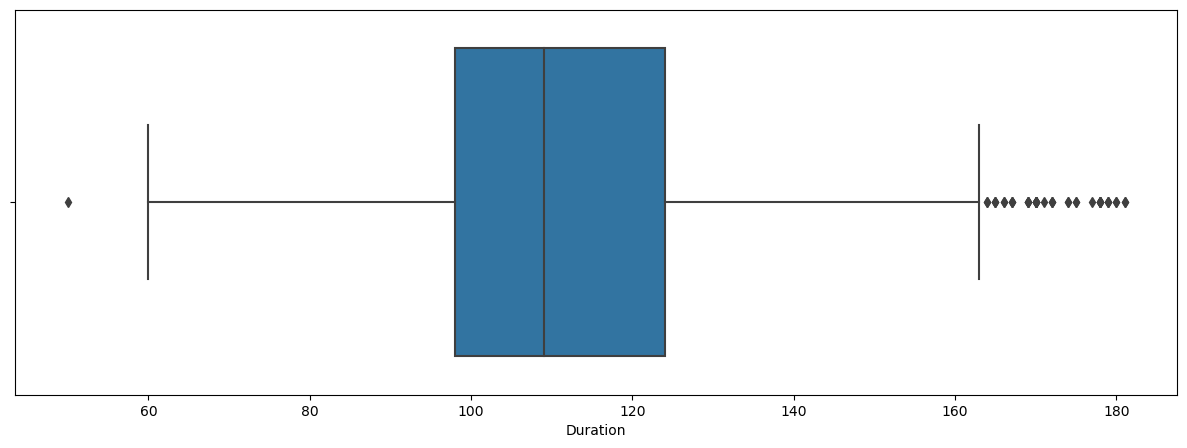

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Duration",data=new_m1)
plt.show()